# imports

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

# Loading Dataset

In [82]:
data= pd.read_csv('vitamins_data.csv')
data.head(8)

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%
0,India,163819614,17.6,13.8
1,Delhi,2016849,17.8,32.5
2,Haryana,3335537,26.1,27.6
3,Himachal Pradesh,793137,5.9,4.6
4,Jammu & Kashmir,1485803,8.7,22.9
5,Punjab,3171829,17.2,52.1
6,Rajasthan,10651002,NaN,25.2
7,Uttarakhand,1360032,14.3,46.4


# Removing Outlier

In [83]:
#As row 1 represents the information of india,while other rows represents states, so  we have to remove it as it is an outlier. 

In [84]:
data = data.drop(labels=0, axis=0)

In [85]:
data.head()

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%
1,Delhi,2016849,17.8,32.5
2,Haryana,3335537,26.1,27.6
3,Himachal Pradesh,793137,5.9,4.6
4,Jammu & Kashmir,1485803,8.7,22.9
5,Punjab,3171829,17.2,52.1


<AxesSubplot:xlabel='Population(0-6)years'>

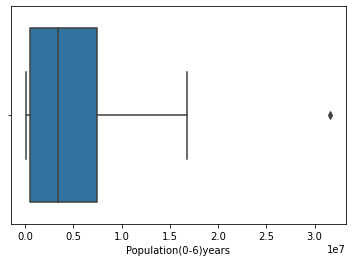

In [86]:
sns.boxplot(x=data['Population(0-6)years'])

In [87]:
#one more outlier is present but we cannot drop that as it represents some state and if we remove that we will not get information about that state.

In [88]:
data.shape

(30, 4)

# Statistical Summary 

In [89]:
data.describe()

,Population(0-6)years,VitA_deficit%,VitD_deficit%
count,3.000000e+01,28.000000,30.000000
mean,5.516359e+06,17.425000,15.860000
std,6.736190e+06,9.912343,13.488248
min,7.819500e+04,2.400000,1.100000
25%,5.492685e+05,9.550000,5.800000
50%,3.445226e+06,17.100000,12.300000
75%,7.458093e+06,21.925000,22.850000
max,3.162463e+07,43.200000,52.100000


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 30 non-null     object 
 1   Population(0-6)years  30 non-null     int64  
 2   VitA_deficit%         28 non-null     float64
 3   VitD_deficit%         30 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


# Checking for null Values

In [91]:
data.isnull().sum()

State                   0
Population(0-6)years    0
VitA_deficit%           2
VitD_deficit%           0
dtype: int64

<AxesSubplot:>

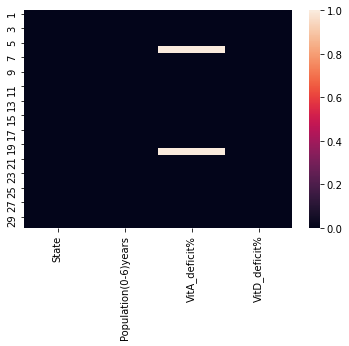

In [92]:
sns.heatmap(data.isnull())

# Removing Null with Mean Value

In [93]:
data['VitA_deficit%'].fillna(data['VitA_deficit%'].mean(), inplace = True)

In [94]:
data.isnull().sum()

State                   0
Population(0-6)years    0
VitA_deficit%           0
VitD_deficit%           0
dtype: int64

<AxesSubplot:>

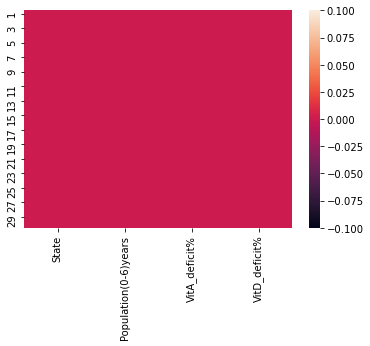

In [95]:
sns.heatmap(data.isnull())

# Exploratory Data Analysis

In [96]:
#first lets relate the population of 0-6 years old in different states of india

<AxesSubplot:title={'center':'Population Vs States'}, xlabel='State'>

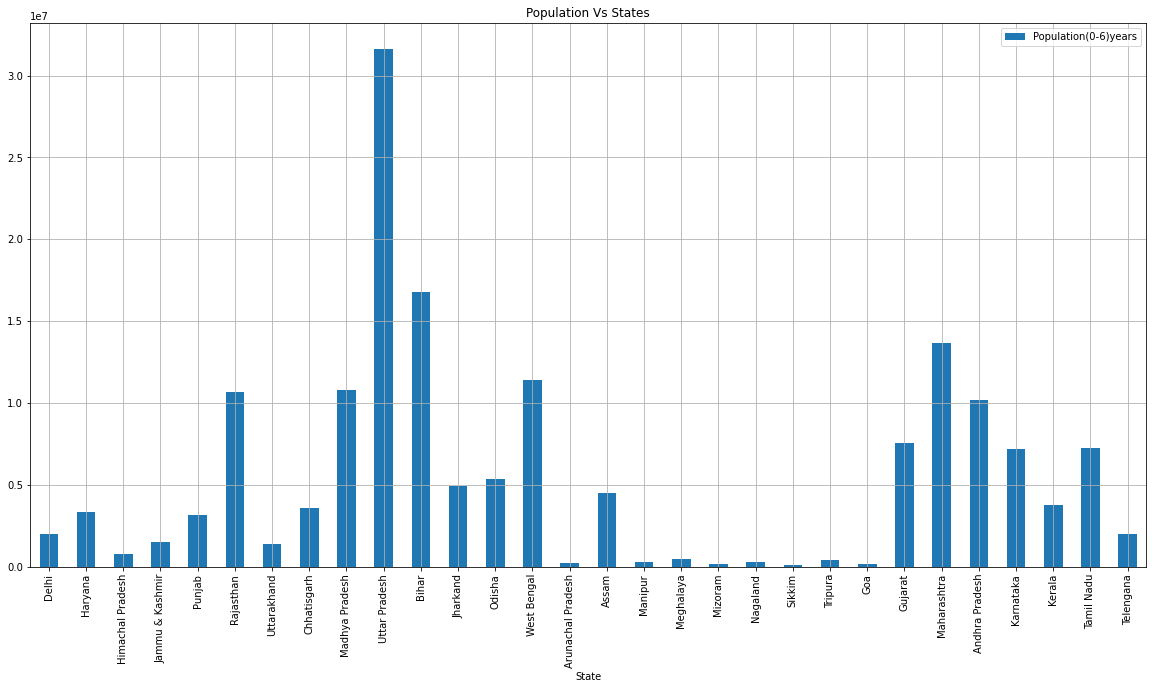

In [97]:
fig, ax= plt.subplots(figsize=(20,10))
data.plot(x= 'State', y ="Population(0-6)years", kind = 'bar',
        title ='Population Vs States', grid=True,ax=ax)

So there are many states which can be selected for our start up to launch their services in solely based on population count.

Most likely more business will be genereted from states like :

Rajasthan
Uttarpradesh
Bihar
West Bengal
Madhya Pradesh
Maharastra
Andhar Pradesh

Note :- These are states with population greater than 10 Millions and this does not visualize whole scenario it is just a speculation based on Total population count of the above given states.

In [98]:
#Now lets see the distribution of population(0-6 years), vitamin A,B deficiency

C:\Users\brainiac Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\brainiac Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\brainiac Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of the column VitD_deficit%')

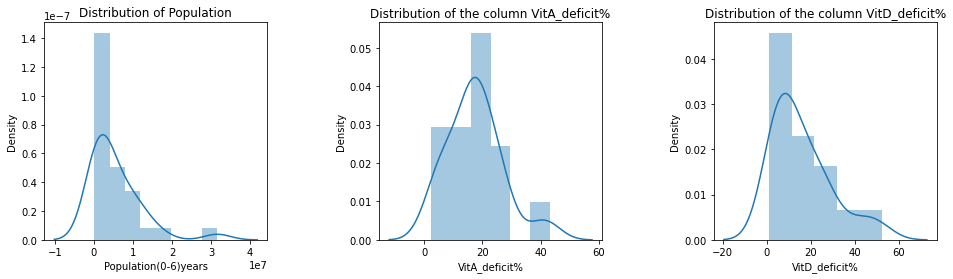

In [99]:
fig,ax = plt.subplots(1,3,figsize=(16,4))
fig.subplots_adjust(wspace = 0.5)
sns.distplot(data['Population(0-6)years'], ax=ax[0]).set_title('Distribution of Population')
sns.distplot(data['VitA_deficit%'], ax=ax[1]).set_title('Distribution of the column VitA_deficit%')
sns.distplot(data['VitD_deficit%'], ax=ax[2]).set_title('Distribution of the column VitD_deficit%')

Adding columns in data repersenting total number of poulation having viatmin A and D deficiency respectively for each state 

In [100]:
data['VitA_deficit_total'] = data['VitA_deficit%'] * data['Population(0-6)years'] /100
data['VitD_deficit_total'] = data['VitD_deficit%'] * data['Population(0-6)years'] /100

In [101]:
data.head()

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%,VitA_deficit_total,VitD_deficit_total
1,Delhi,2016849,17.8,32.5,358999.122,655475.925
2,Haryana,3335537,26.1,27.6,870575.157,920608.212
3,Himachal Pradesh,793137,5.9,4.6,46795.083,36484.302
4,Jammu & Kashmir,1485803,8.7,22.9,129264.861,340248.887
5,Punjab,3171829,17.2,52.1,545554.588,1652522.909


In [102]:
#Now lets see the vitamin A deficit numbers in each states

<AxesSubplot:title={'center':'Vitamin A deficit Vs States'}, xlabel='State'>

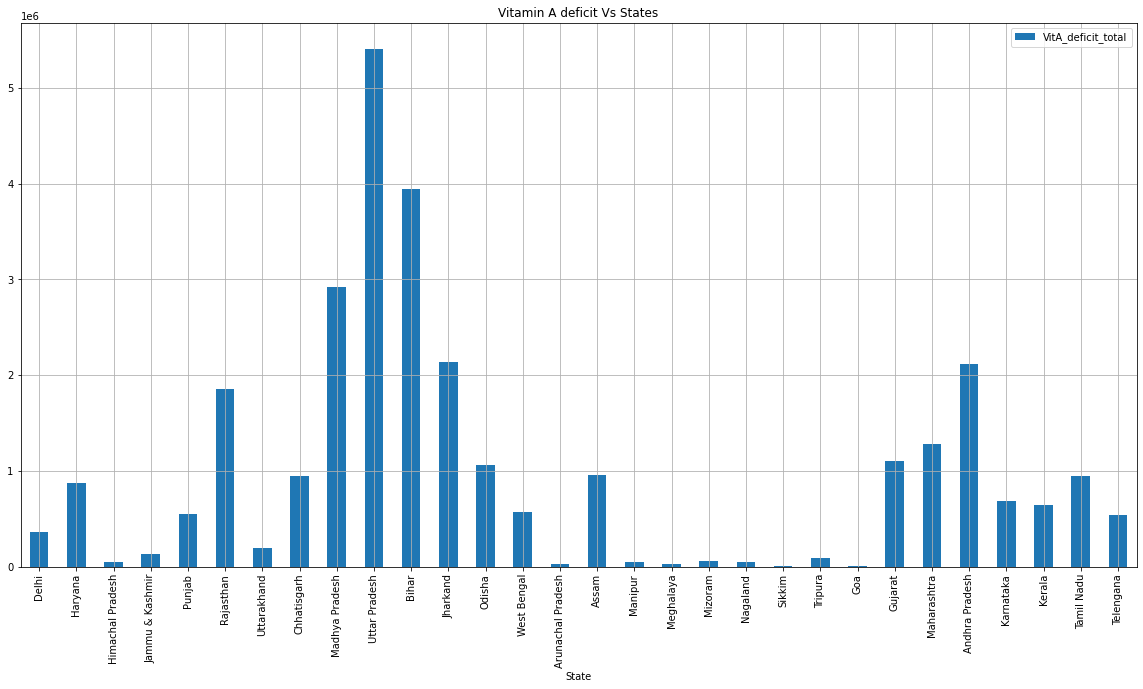

In [103]:
fig, ax= plt.subplots(figsize=(20,10))
data.plot(x= 'State', y ="VitA_deficit_total", kind = 'bar',
        title ='Vitamin A deficit Vs States', grid=True,ax=ax)

In [104]:
#Now lets see the vitamin D deficit numbers in each states

<AxesSubplot:title={'center':'Vitamin D deficit Vs States'}, xlabel='State'>

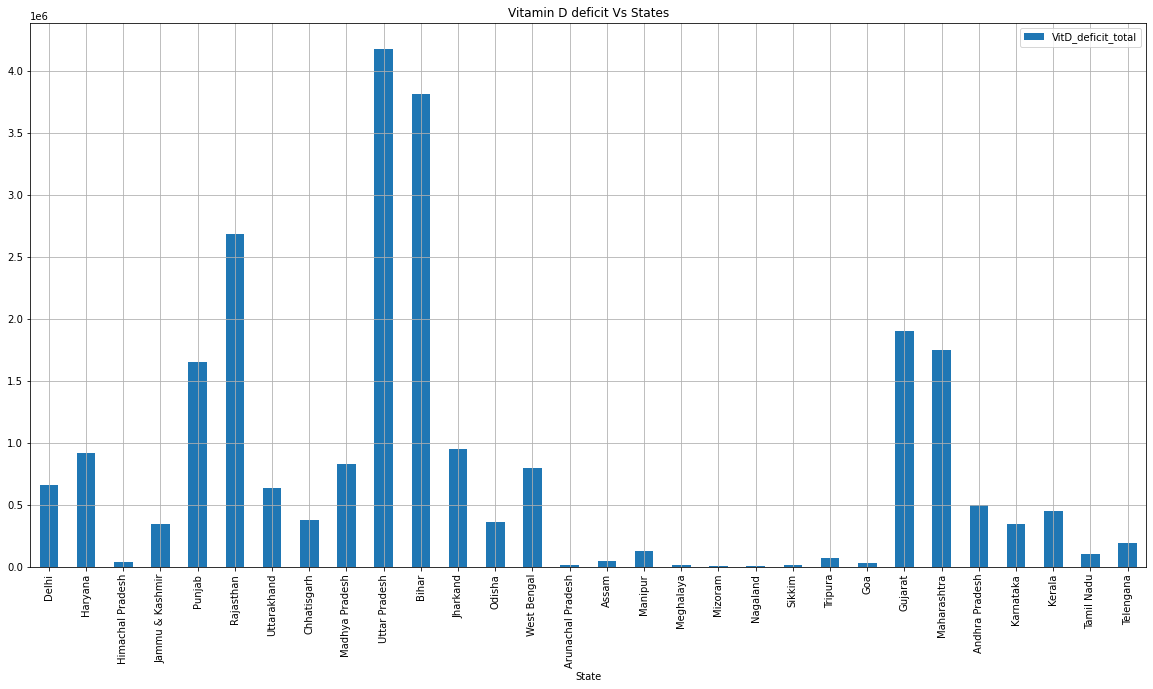

In [105]:
fig, ax= plt.subplots(figsize=(20,10))
data.plot(x= 'State', y = "VitD_deficit_total", kind = 'bar',
        title ='Vitamin D deficit Vs States', grid=True,ax=ax)

In [106]:
#Comparison of Vitamin A and D deficiency in differecnt states

<AxesSubplot:title={'center':'Percentage of deficiency of Vitamin A and Vitamin D'}, xlabel='State'>

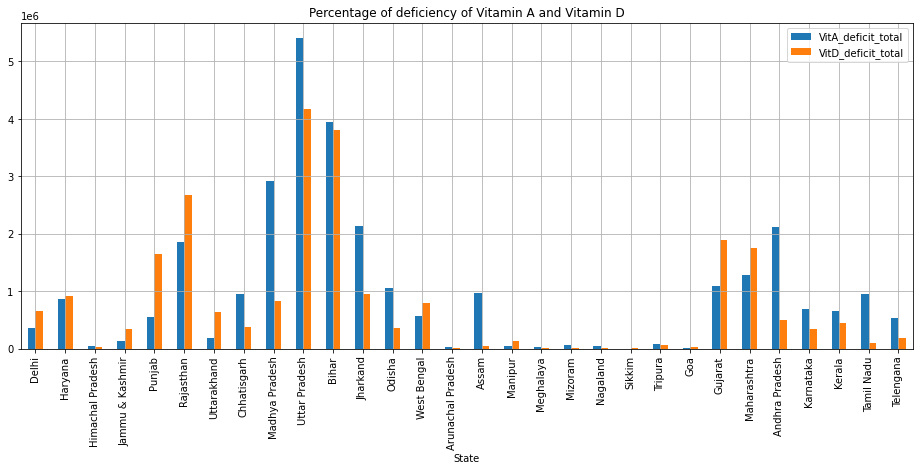

In [107]:
fig, ax= plt.subplots(figsize=(16,6))
data.plot(x= 'State', y =['VitA_deficit_total', 'VitD_deficit_total'], kind = 'bar',
        title ='Percentage of deficiency of Vitamin A and Vitamin D', grid=True,ax=ax)

With this We can conclude in most states vitamin A Defficiency is more common, So our medical service should focus more vitamin A rich medicines. 

In [108]:
#Correlation between features using heatmap

<AxesSubplot:>

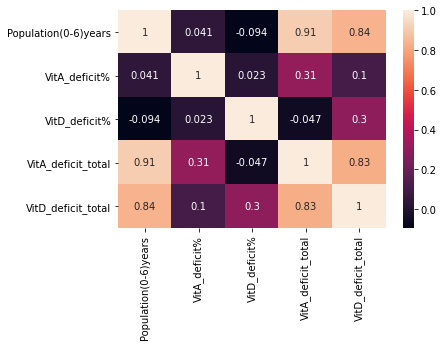

In [109]:
sns.heatmap(data.corr(),annot=True)

1.According to this total childs with Vitamin A and Vitamin D defficiency is highly correlated with its population. Hence more bussiness will be generated if we setup our services in more populated area.
2.Vitamin A deficiency is highly correlated with vitamin D i.e., if a person is having vitamin A deficency then there is higher probability that they have vitamin D deficiency and vise versa.

In [110]:
#Distribution of Vitamin A deficiency over different states

In [111]:
fig = px.pie(data, values='VitA_deficit_total', names='State')
fig.show()

In [112]:
#Distribution of Vitamin D deficiency over different states

In [113]:
fig = px.pie(data, values='VitD_deficit_total', names='State')
fig.show()

In [114]:
#Clustering similar states together to operate our bussiness similarly in similar states

In [115]:
train = data[['VitA_deficit%','VitD_deficit%','VitA_deficit_total','VitD_deficit_total']]

In [116]:
sc= StandardScaler().fit(train)
train_std = sc.transform(train)

In [117]:
from sklearn.cluster import KMeans

C:\Users\brainiac Abhinav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



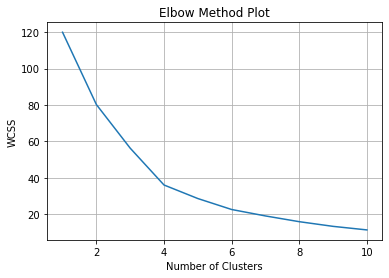

In [118]:
wcss =[]
#wcss = Within Cluster Sum of Squares
for i in range(1,11):
    kmns= KMeans(n_clusters = i, init = 'k-means++', random_state =23)
    kmns.fit(train_std)
    wcss.append(kmns.inertia_)
    
#Plotting to find the optimum number of clusters    
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method Plot')
plt.grid(True)
plt.show()

In [119]:
kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(train_std)
print(label)

[2 2 0 0 2 4 2 3 3 1 1 3 3 0 0 3 2 0 3 0 0 3 0 4 4 3 0 0 0 3]


In [120]:
data['Cluster']=label
data.head()

,State,Population(0-6)years,VitA_deficit%,VitD_deficit%,VitA_deficit_total,VitD_deficit_total,Cluster
1,Delhi,2016849,17.8,32.5,358999.122,655475.925,2
2,Haryana,3335537,26.1,27.6,870575.157,920608.212,2
3,Himachal Pradesh,793137,5.9,4.6,46795.083,36484.302,0
4,Jammu & Kashmir,1485803,8.7,22.9,129264.861,340248.887,0
5,Punjab,3171829,17.2,52.1,545554.588,1652522.909,2


In [121]:
df1 = data[data['Cluster']==0]
df2 = data[data['Cluster']==1]
df3 = data[data['Cluster']==2]
df4 = data[data['Cluster']==3]
df5 = data[data['Cluster']==4]

In [122]:
cluster1 = df1.State
cluster2 = df2.State
cluster3 = df3.State
cluster4 = df4.State
cluster5 = df5.State

print('States in Cluster1 are ', cluster1.to_numpy())

print('States in Cluster2 are ', cluster2.to_numpy())

print('States in Cluster3 are ', cluster3.to_numpy())

print('States in Cluster4 are ', cluster4.to_numpy())
print('States in Cluster5 are ', cluster5.to_numpy())

States in Cluster1 are  ['Himachal Pradesh' 'Jammu & Kashmir' 'West Bengal' 'Arunachal Pradesh'
 'Meghalaya' 'Nagaland' 'Sikkim' 'Goa' 'Karnataka' 'Kerala' 'Tamil Nadu']
States in Cluster2 are  ['Uttar Pradesh' 'Bihar']
States in Cluster3 are  ['Delhi' 'Haryana' 'Punjab' 'Uttarakhand' 'Manipur']
States in Cluster4 are  ['Chhatisgarh' 'Madhya Pradesh' 'Jharkand' 'Odisha' 'Assam' 'Mizoram'
 'Tripura' 'Andhra Pradesh' 'Telengana']
States in Cluster5 are  ['Rajasthan' 'Gujarat' 'Maharashtra']


Hence our business strategy should be:
-> similar for states  ['Uttar Pradesh' 'Bihar']
-> similar for states  ['Himachal Pradesh' 'Jammu & Kashmir' 'West Bengal' 'Arunachal Pradesh'
 'Meghalaya' 'Nagaland' 'Sikkim' 'Goa' 'Karnataka' 'Kerala' 'Tamil Nadu']
-> similar for states  ['Delhi' 'Haryana' 'Punjab' 'Uttarakhand' 'Manipur']
-> similar for states ['Rajasthan' 'Gujarat' 'Maharashtra']